In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt

In [4]:
df=pd.read_csv('Hotel Reservations.csv')

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# EDA

In [6]:
#checking duplicates
[x for x in df.duplicated() if x==True]

[]

In [7]:
#checking for null values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
#replacing the values of Not_Canceled and Canceled to 0 and 1 respectively
df_test=df.booking_status.replace({'Not_Canceled':0,'Canceled':1})
df_test.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [9]:
#separating the test data from df
df_train=df.drop('booking_status',axis=1)
df_train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0


Checking the price of room per number of people

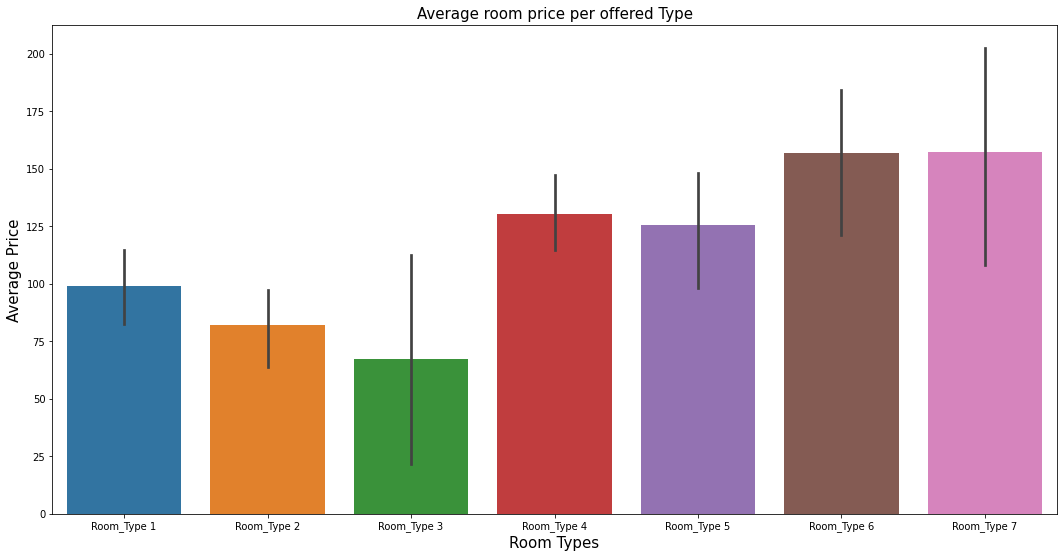

In [13]:
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_adults', 'no_of_children'])['avg_price_per_room'].agg('mean').reset_index()

fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
ax.set_title('Average room price per offered Type', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

Looking at the Type of Meal Plan column

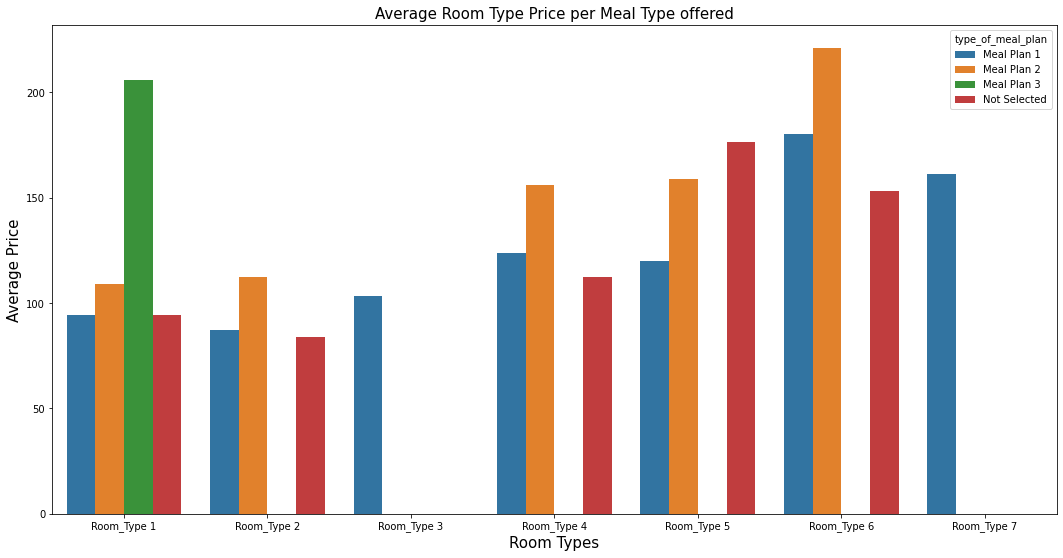

In [14]:
price_meal_room = df_train.groupby(['room_type_reserved', 'type_of_meal_plan']) \
                                    ['avg_price_per_room'] \
                                    .agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(data=price_meal_room, x='room_type_reserved', y='avg_price_per_room', hue='type_of_meal_plan')
ax.set_title('Average Room Type Price per Meal Type offered', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

From above observations we conclude that
1. Room Type 3 has only the Meal Plan 1 which makes sense because it's the cheapest room.
2. Room 7 also has only the Meal Plan 1 besides being the most expensive by mean.
3. Room Type 1 offers all meals, with the Meal Plan 3 being very expensive
4. All rooms that have a Not Selected meal plan will be transformed to 0 since they are false aggregated value

In [16]:
meal_average_values = price_meal_room.groupby(["type_of_meal_plan"]).avg_price_per_room.std()
meal_average_values = list(meal_average_values)
meal_average_values

[34.64855288169612, 73.95515129470458, 118.9341554530629, 68.55420240100878]

In [17]:
#Not Selected = 0

meal_average_values[3] = 0.0
meal_average_values

[34.64855288169612, 73.95515129470458, 118.9341554530629, 0.0]

In [18]:
#Listing the meal types
meal_types = sorted(list(df_train.type_of_meal_plan.drop_duplicates()))
meal_types


['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected']

In [19]:
#joining the no. of adults and childrens
df_train['no_of_people'] = df_train.no_of_adults + df_train.no_of_children
df_train[['no_of_adults', 'no_of_children', 'no_of_people']]

,no_of_adults,no_of_children,no_of_people
0,2,0,2
1,2,0,2
2,1,0,1
3,2,0,2
4,2,0,2
...,...,...,...
36270,3,0,3
36271,2,0,2
36272,2,0,2
36273,2,0,2


# Visualizing the Average Room Type Price per Number of People

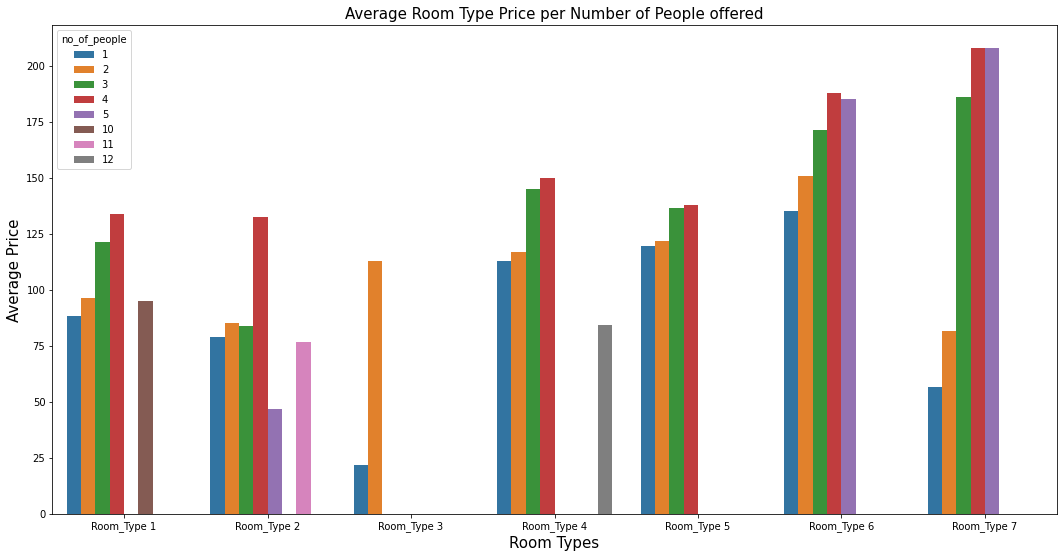

In [20]:
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_people']) \
                                    ['avg_price_per_room'] \
                                    .agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room', hue='no_of_people')
ax.set_title('Average Room Type Price per Number of People offered', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()





Interesting to note that Room_Type 3 can only acommodate 2 people at max.

Room_Type 3 also is the cheapest room in average.

Other strange info is that Room_Type 4 can either acommodate to 4 people or 12, no between data.


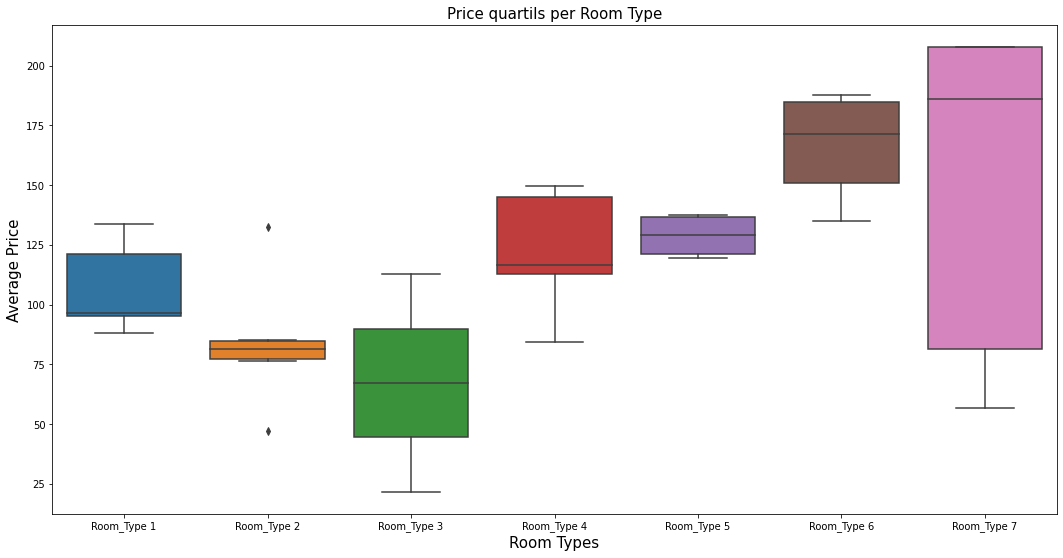

In [21]:
#Looking for outliers in the average price per room type
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_people']) \
                                    ['avg_price_per_room'] \
                                    .agg('mean').reset_index()


fig, ax = plt.subplots(figsize=(18,9))
sns.boxplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
ax.set_title('Price quartils per Room Type', fontsize= 15)
plt.xlabel("Room Types", fontsize= 15)
plt.ylabel("Average Price", fontsize= 15)
plt.show()

From the above observation we conclude that
1. Room Type 3 is the cheapest room by average
2. Room Type 6 and 7 are the expensive rooms by average
3. Room Type 1 and 2 are average price close to each other, with 2 having a big difference in outliers
4. Room Type 4 and 5 are the most consistent in terms of average price.


In [28]:
#Listing the room types and replacing the string values by the mean of the boxplot graphs above.

room_average_values = price_people_room.groupby(["room_type_reserved"]).avg_price_per_room.median().reset_index()
room_average_values

,room_type_reserved,avg_price_per_room
0,Room_Type 1,96.357592
1,Room_Type 2,81.444630
2,Room_Type 3,67.177083
3,Room_Type 4,116.658172
4,Room_Type 5,129.103291
5,Room_Type 6,171.447692
6,Room_Type 7,185.853793


In [29]:
room_type = room_average_values.room_type_reserved.values.tolist()
room_type

['Room_Type 1',
 'Room_Type 2',
 'Room_Type 3',
 'Room_Type 4',
 'Room_Type 5',
 'Room_Type 6',
 'Room_Type 7']

In [30]:
room_average_values = room_average_values.avg_price_per_room.values.tolist()
room_average_values

[96.3575918910627,
 81.44462962962963,
 67.17708333333333,
 116.65817189249714,
 129.1032905982906,
 171.44769230769228,
 185.85379310344828]

In [31]:
#Dropping the Booking_ID column fro df_train
df_train = df_train.drop('Booking_ID', axis = 1)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,2


In [32]:
#Replacing all string values in the df_train
# Replacing room type str
mapping = {room_type[i]: room_average_values[i] for i in range(len(room_type))}
df_train.room_type_reserved = df_train.room_type_reserved.map(mapping)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,96.357592,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,96.357592,5,2018,11,6,Online,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,96.357592,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,96.357592,211,2018,5,20,Online,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,96.357592,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,116.658172,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,96.357592,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,96.357592,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,96.357592,63,2018,4,21,Online,0,0,0,94.50,0,2


In [33]:
# Replacing market segmentation str
market_seg = list(df_train.market_segment_type.drop_duplicates())
df_train.market_segment_type = df_train.market_segment_type.replace(market_seg, [1,2,3,4,5])
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,96.357592,224,2017,10,2,1,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,96.357592,5,2018,11,6,2,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,96.357592,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,96.357592,211,2018,5,20,2,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,96.357592,48,2018,4,11,2,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,116.658172,85,2018,8,3,2,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,96.357592,228,2018,10,17,2,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,96.357592,148,2018,7,1,2,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,96.357592,63,2018,4,21,2,0,0,0,94.50,0,2


In [34]:
# Replacing type meal str
mapping = {meal_types[i]: meal_average_values[i] for i in range(len(meal_types))}
df_train.type_of_meal_plan = df_train.type_of_meal_plan.map(mapping)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,34.648553,0,96.357592,224,2017,10,2,1,0,0,0,65.00,0,2
1,2,0,2,3,0.000000,0,96.357592,5,2018,11,6,2,0,0,0,106.68,1,2
2,1,0,2,1,34.648553,0,96.357592,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,34.648553,0,96.357592,211,2018,5,20,2,0,0,0,100.00,0,2
4,2,0,1,1,0.000000,0,96.357592,48,2018,4,11,2,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,34.648553,0,116.658172,85,2018,8,3,2,0,0,0,167.80,1,3
36271,2,0,1,3,34.648553,0,96.357592,228,2018,10,17,2,0,0,0,90.95,2,2
36272,2,0,2,6,34.648553,0,96.357592,148,2018,7,1,2,0,0,0,98.39,2,2
36273,2,0,0,3,0.000000,0,96.357592,63,2018,4,21,2,0,0,0,94.50,0,2


# Random Forest Classifier

Training and testing values

In [35]:
X = df_train.values
Y = df_test.values

In [36]:
split_test_size = 0.30

In [37]:
#creating train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_test_size, random_state=42)

In [38]:
#Applying the algorithm
model_v1 = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
model_v1.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=20, n_estimators=200)

In [39]:
score = model_v1.score(X_train, Y_train.ravel())
score

0.9672337744171392

In [40]:
#train and test predictions
nb_predict_train = model_v1.predict(X_train)
print("Accuracy over Training data: {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))
nb_predict_test = model_v1.predict(X_test)
print("Accuracy over Testing data: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))

Accuracy over Training data: 0.9672
Accuracy over Testing data: 0.9027


## Model Classification Report

In [41]:
print(metrics.classification_report(Y_test, nb_predict_test, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.89      0.81      0.85      3607
           0       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



Cross Validation Score and Training Score Plots

<AxesSubplot:title={'center':'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

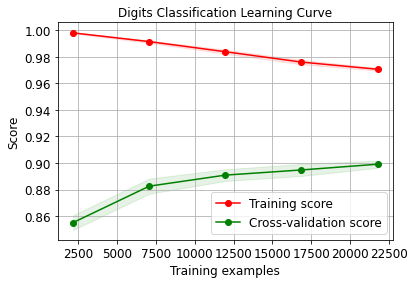

In [42]:
skplt.estimators.plot_learning_curve(model_v1, X_train, Y_train,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")